## Fetal Health - Exploratory Data Analysis

This project's data comes from kaggle. I will leave a link here to the source page: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?datasetId=916586&sortBy=voteCount&sort=votes

With this project, I will attempt to create a model that classifies records/information from cardiotocogram exams into three different statuses, originally labelled by obstetritians. 

This notebook will focus on EDA and any transformations to use towards model building.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Documents/FetalHealthClassification/fetal_health.csv")

In [44]:
#Target -> fetal_health
#1 -> Normal
#2 -> Suspect
#3 -> Pathological (pathological meaning potential involvement of disease)

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [192]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,5.0,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [45]:
df.shape

(2126, 22)

In [46]:
#Checking for any null values, for which we don't have any with this data.

df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [47]:
#There doesn't seem to be any abnormalities from glancing the common statistics here. 
#The min and max baseline heart rate is 106 and 160 respectively.

df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


We can see we don't have any object or string datatype columns, and our target is already set to float. 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

We'll also have to keep in mind there are many more normal records than there are suspect or pathological.

In [54]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

To start our EDA, we can make some boxplots of the different attributes we have split by the fetal health classification target.

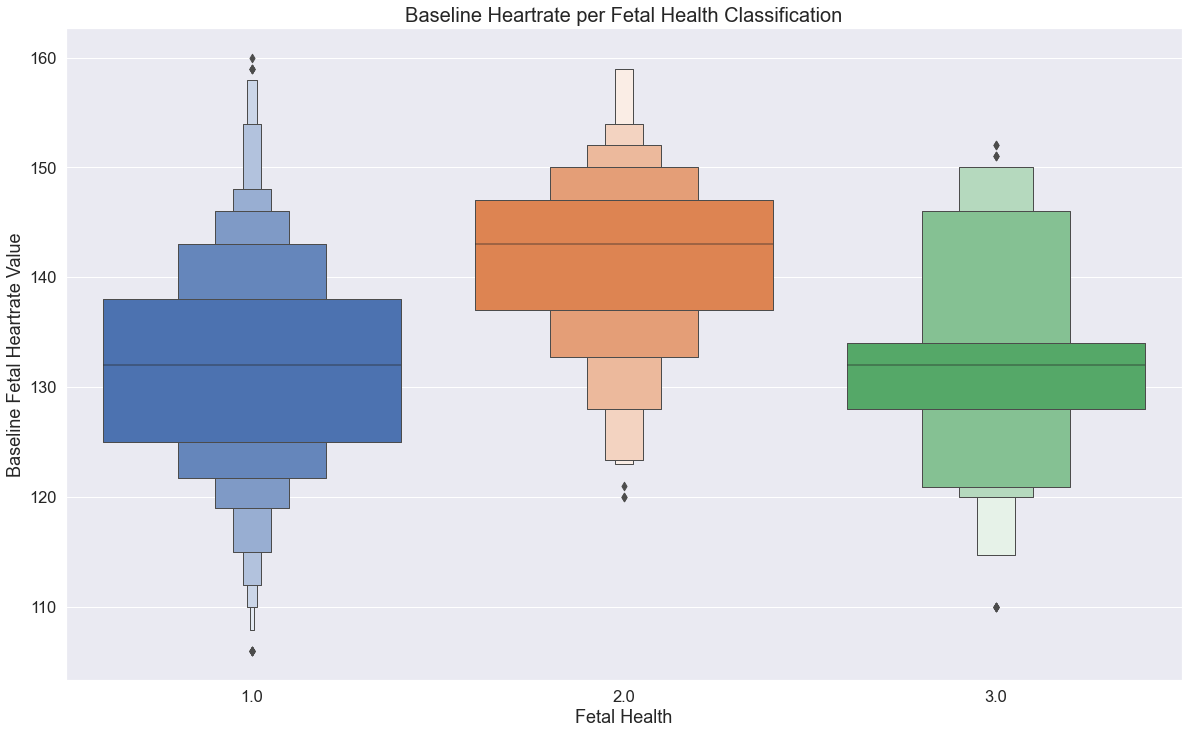

In [49]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,12))
g = sns.boxenplot(x='fetal_health', y='baseline value', data=df,
             saturation=1.5)
g.set_xlabel('Fetal Health')
g.set_ylabel('Baseline Fetal Heartrate Value')
g.set_title('Baseline Heartrate per Fetal Health Classification', fontsize=20)
plt.show()

2.0 marks records that are suspect for poor condition. Those that are normal or pathological seem to be somewhat similar.

Next we'll try fetal movements and see if there are any further trends there.

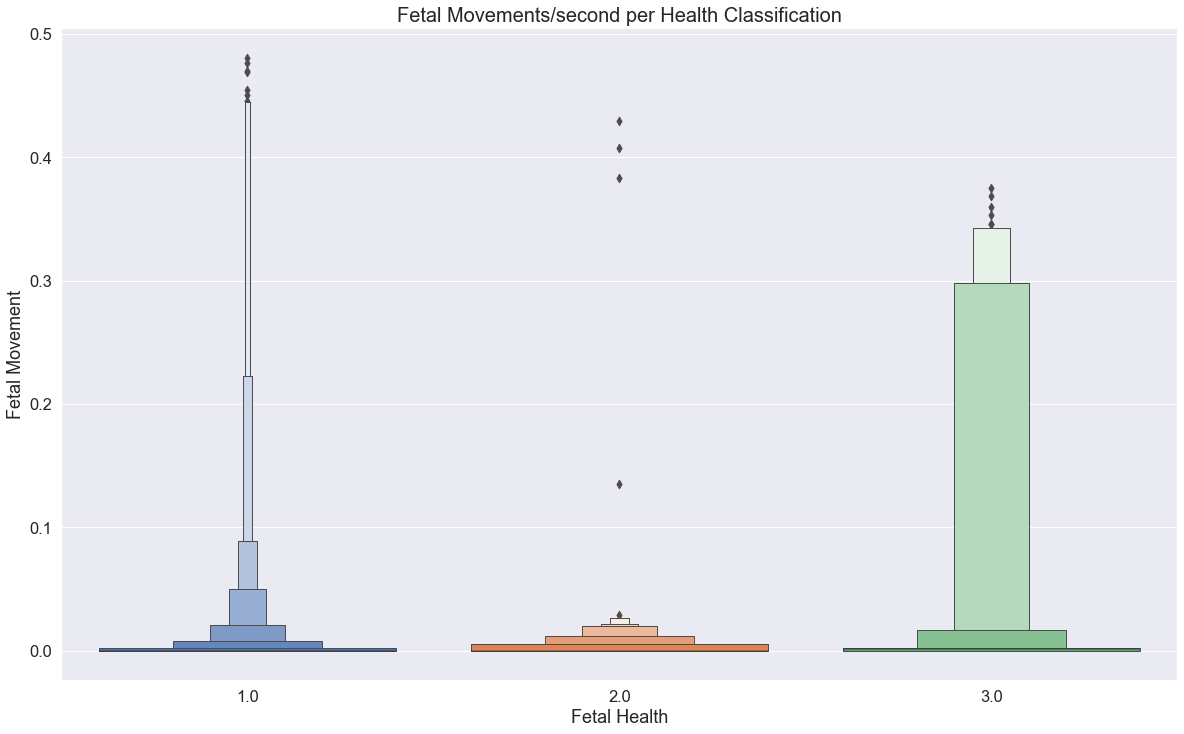

In [50]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,12))
g = sns.boxenplot(x='fetal_health', y='fetal_movement', data=df,
             saturation=1.5)
g.set_xlabel('Fetal Health')
g.set_ylabel('Fetal Movement')
g.set_title('Fetal Movements/second per Health Classification', fontsize=20)
plt.show()

There seems to more commonly be movements among reocrds classified as pathological.

Now we'll look at uterine contractions

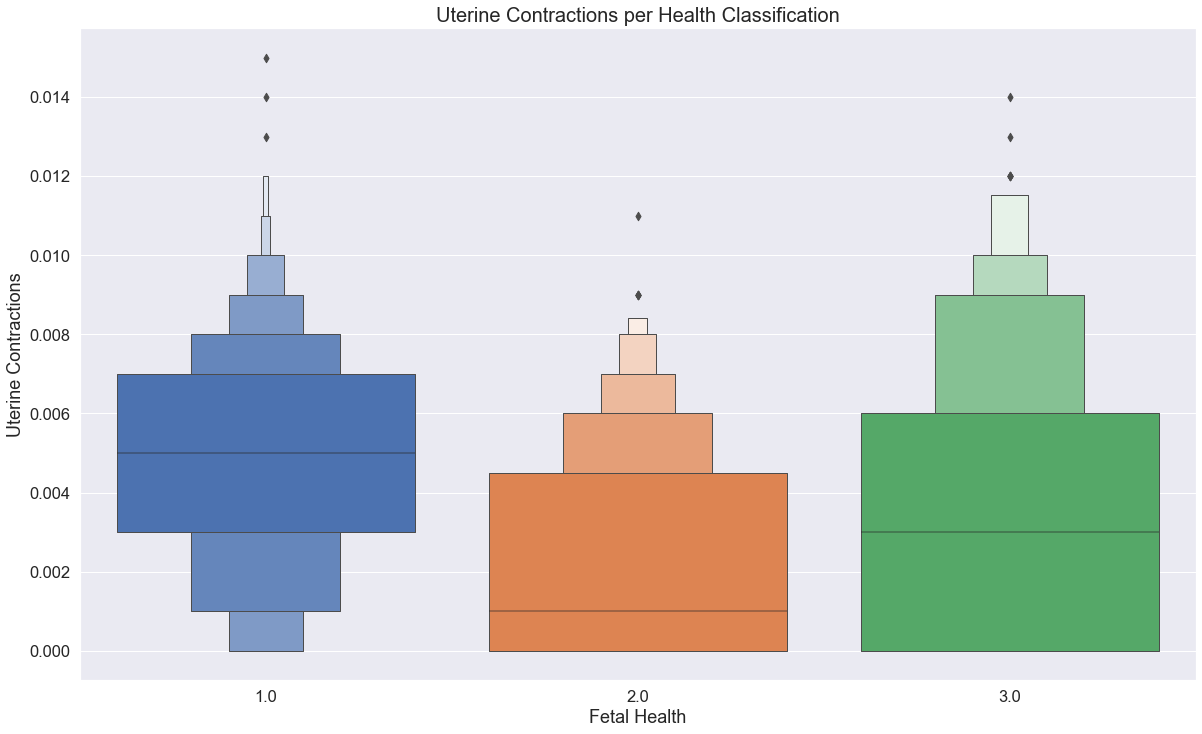

In [4]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,12))
g = sns.boxenplot(x='fetal_health', y='uterine_contractions', data=df,
             saturation=1.5)
g.set_xlabel('Fetal Health')
g.set_ylabel('Uterine Contractions')
g.set_title('Uterine Contractions per Health Classification', fontsize=20)
plt.show()

There doesn't seem to be a lot of variability among uterine contractions. There are more higher values for normal records.

Now, we'll look at each of the deceleration attributes.

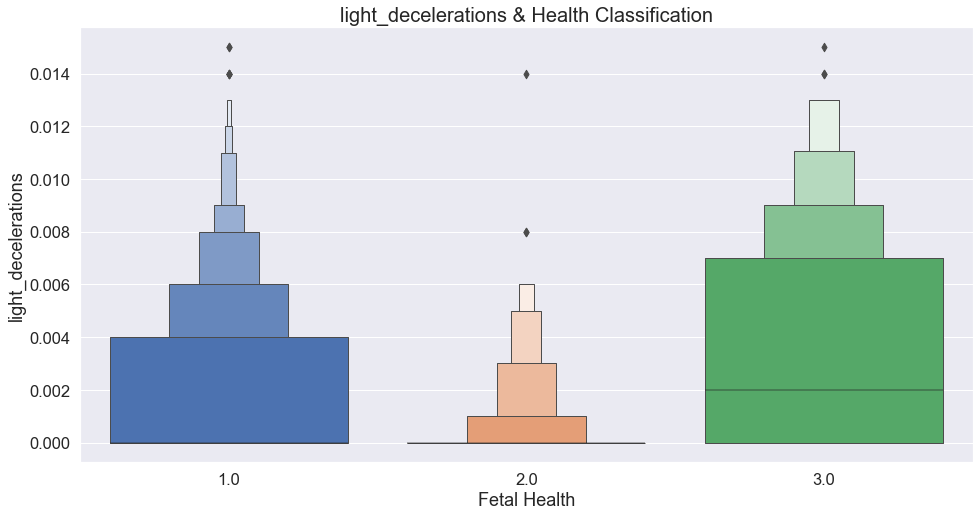

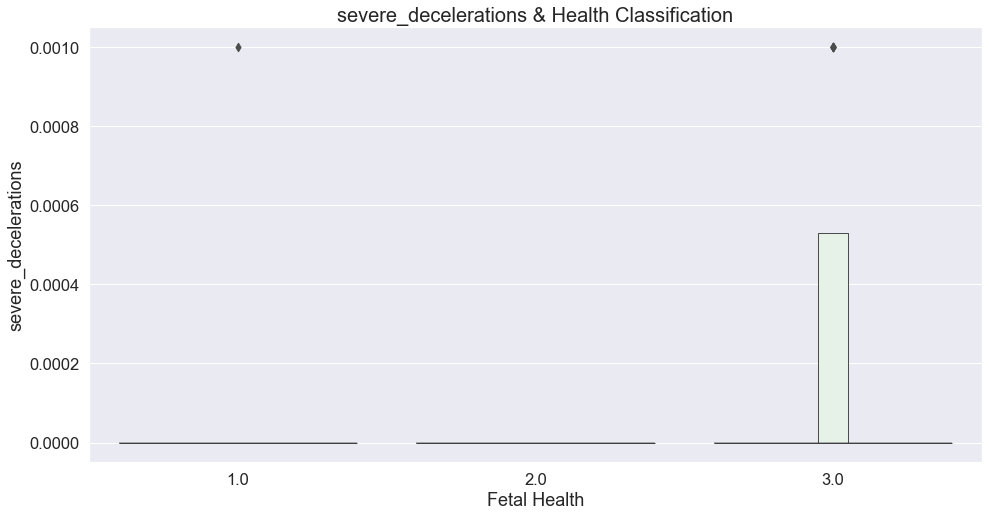

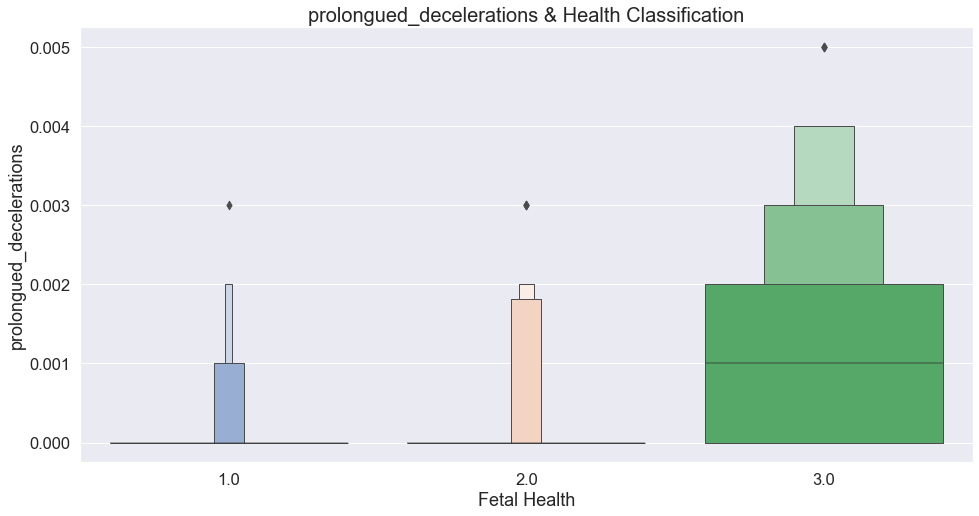

In [52]:
dec_cols = ['light_decelerations', 'severe_decelerations', 'prolongued_decelerations'] #there may be a typo in the last column here

for col in dec_cols:
    sns.set(font_scale=1.5)
    plt.figure(figsize=(16,8))
    g = sns.boxenplot(x='fetal_health', y=col, data=df,
             saturation=1.5)
    g.set_xlabel('Fetal Health')
    g.set_ylabel(col)
    g.set_title('{} & Health Classification'.format(col), fontsize=20)
    plt.show()

We can see there is much more deceleration among pathological records than normal or suspect records. I've also noticed some traits among normal and pathological records seem to be similar, such as light decelerations and baseline heart rate.

Now I'll create a pair plot to look at distributions across these different attributes and among the 3 different classes provided.

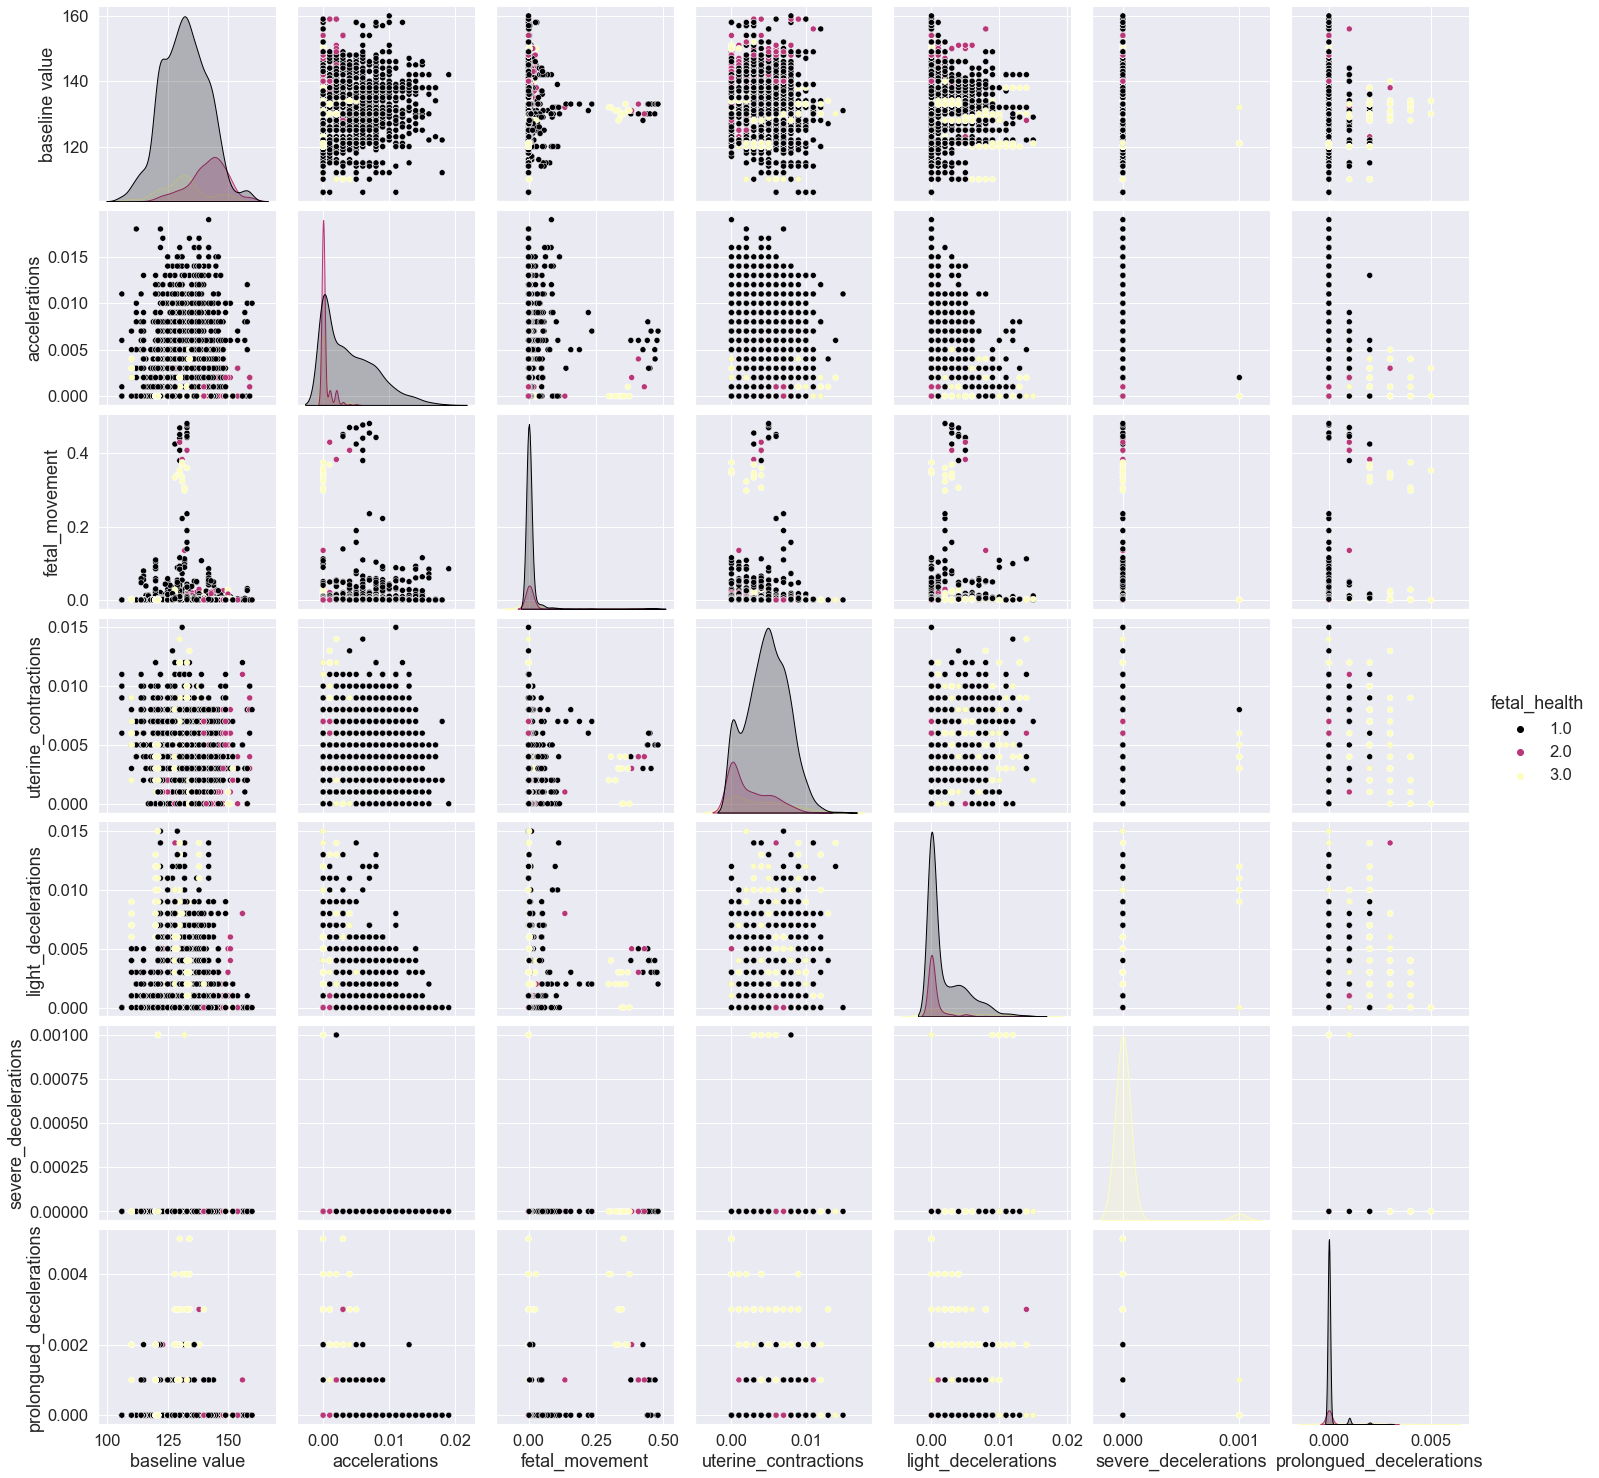

In [179]:
pair_cols = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'fetal_health']

sns.pairplot(df[pair_cols], hue="fetal_health", height=3, aspect=1, palette='magma')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pairplot for Various Attributes', fontsize=26)
plt.show()

We can see there are primarily pathological records recording higher values within severe decelerations as well as prolonged decelerations in relation to baseline heartrate and a few other attributes (at the bottom). So we can note that these pathological records have a trace for higher values in these relations. This is keeping in mind the lower amount of pathological records.

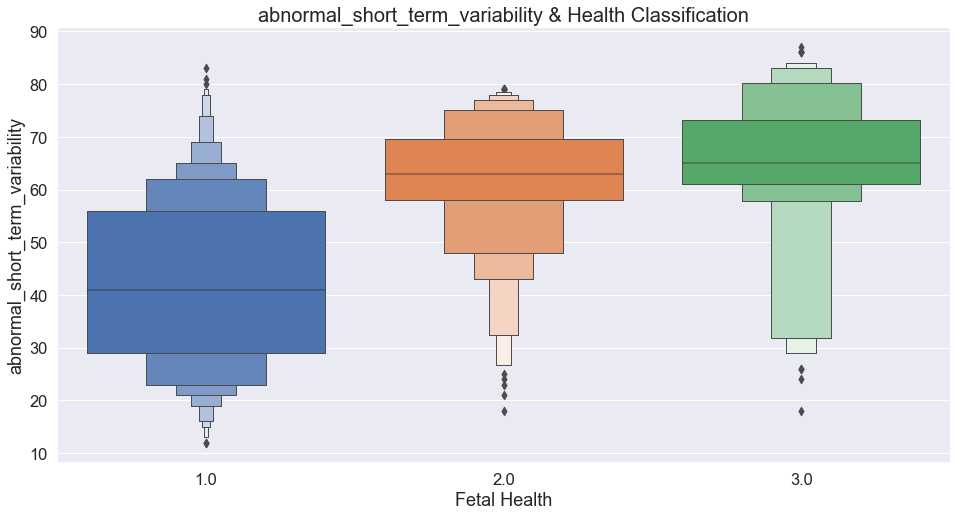

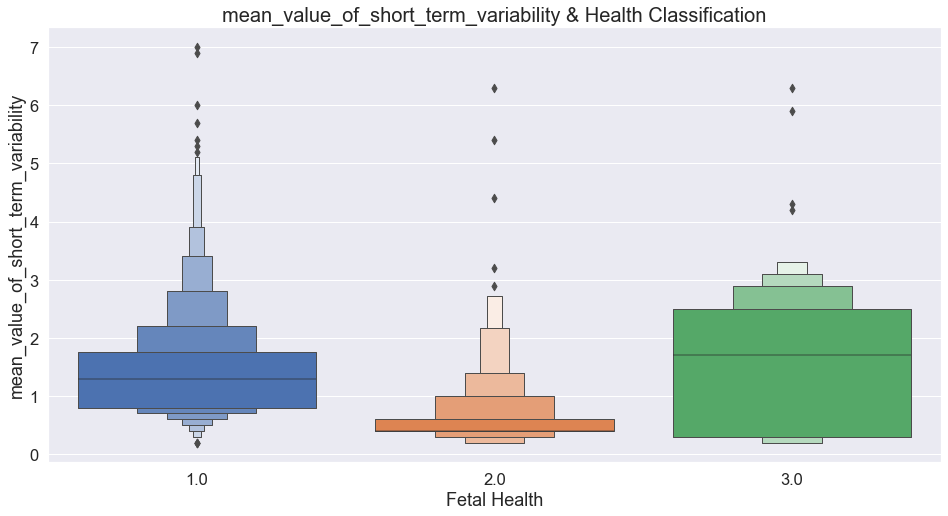

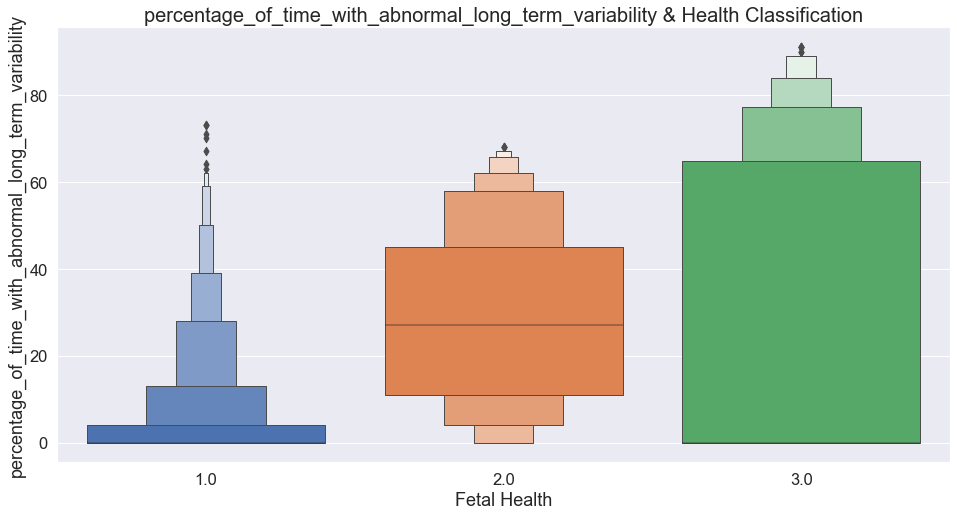

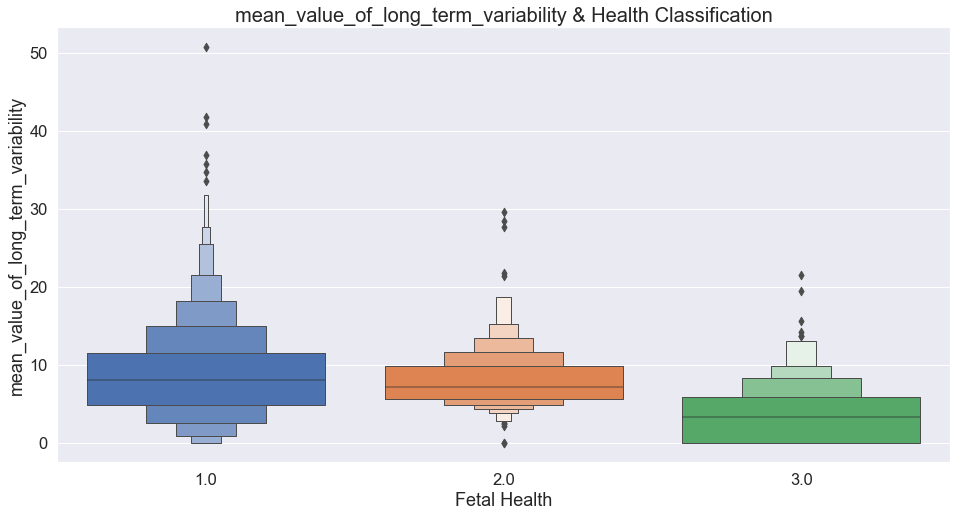

In [55]:
var_cols = ['abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

for col in var_cols:
    sns.set(font_scale=1.5)
    plt.figure(figsize=(16,8))
    g = sns.boxenplot(x='fetal_health', y=col, data=df,
             saturation=1.5)
    g.set_xlabel('Fetal Health')
    g.set_ylabel(col)
    g.set_title('{} & Health Classification'.format(col), fontsize=20)
    plt.show()

Suspect and pathological records seem to have higher abonormal short term variability as well as generally higher percentage of time with abnormal long term variability.

In [157]:
var_cols.append('fetal_health')

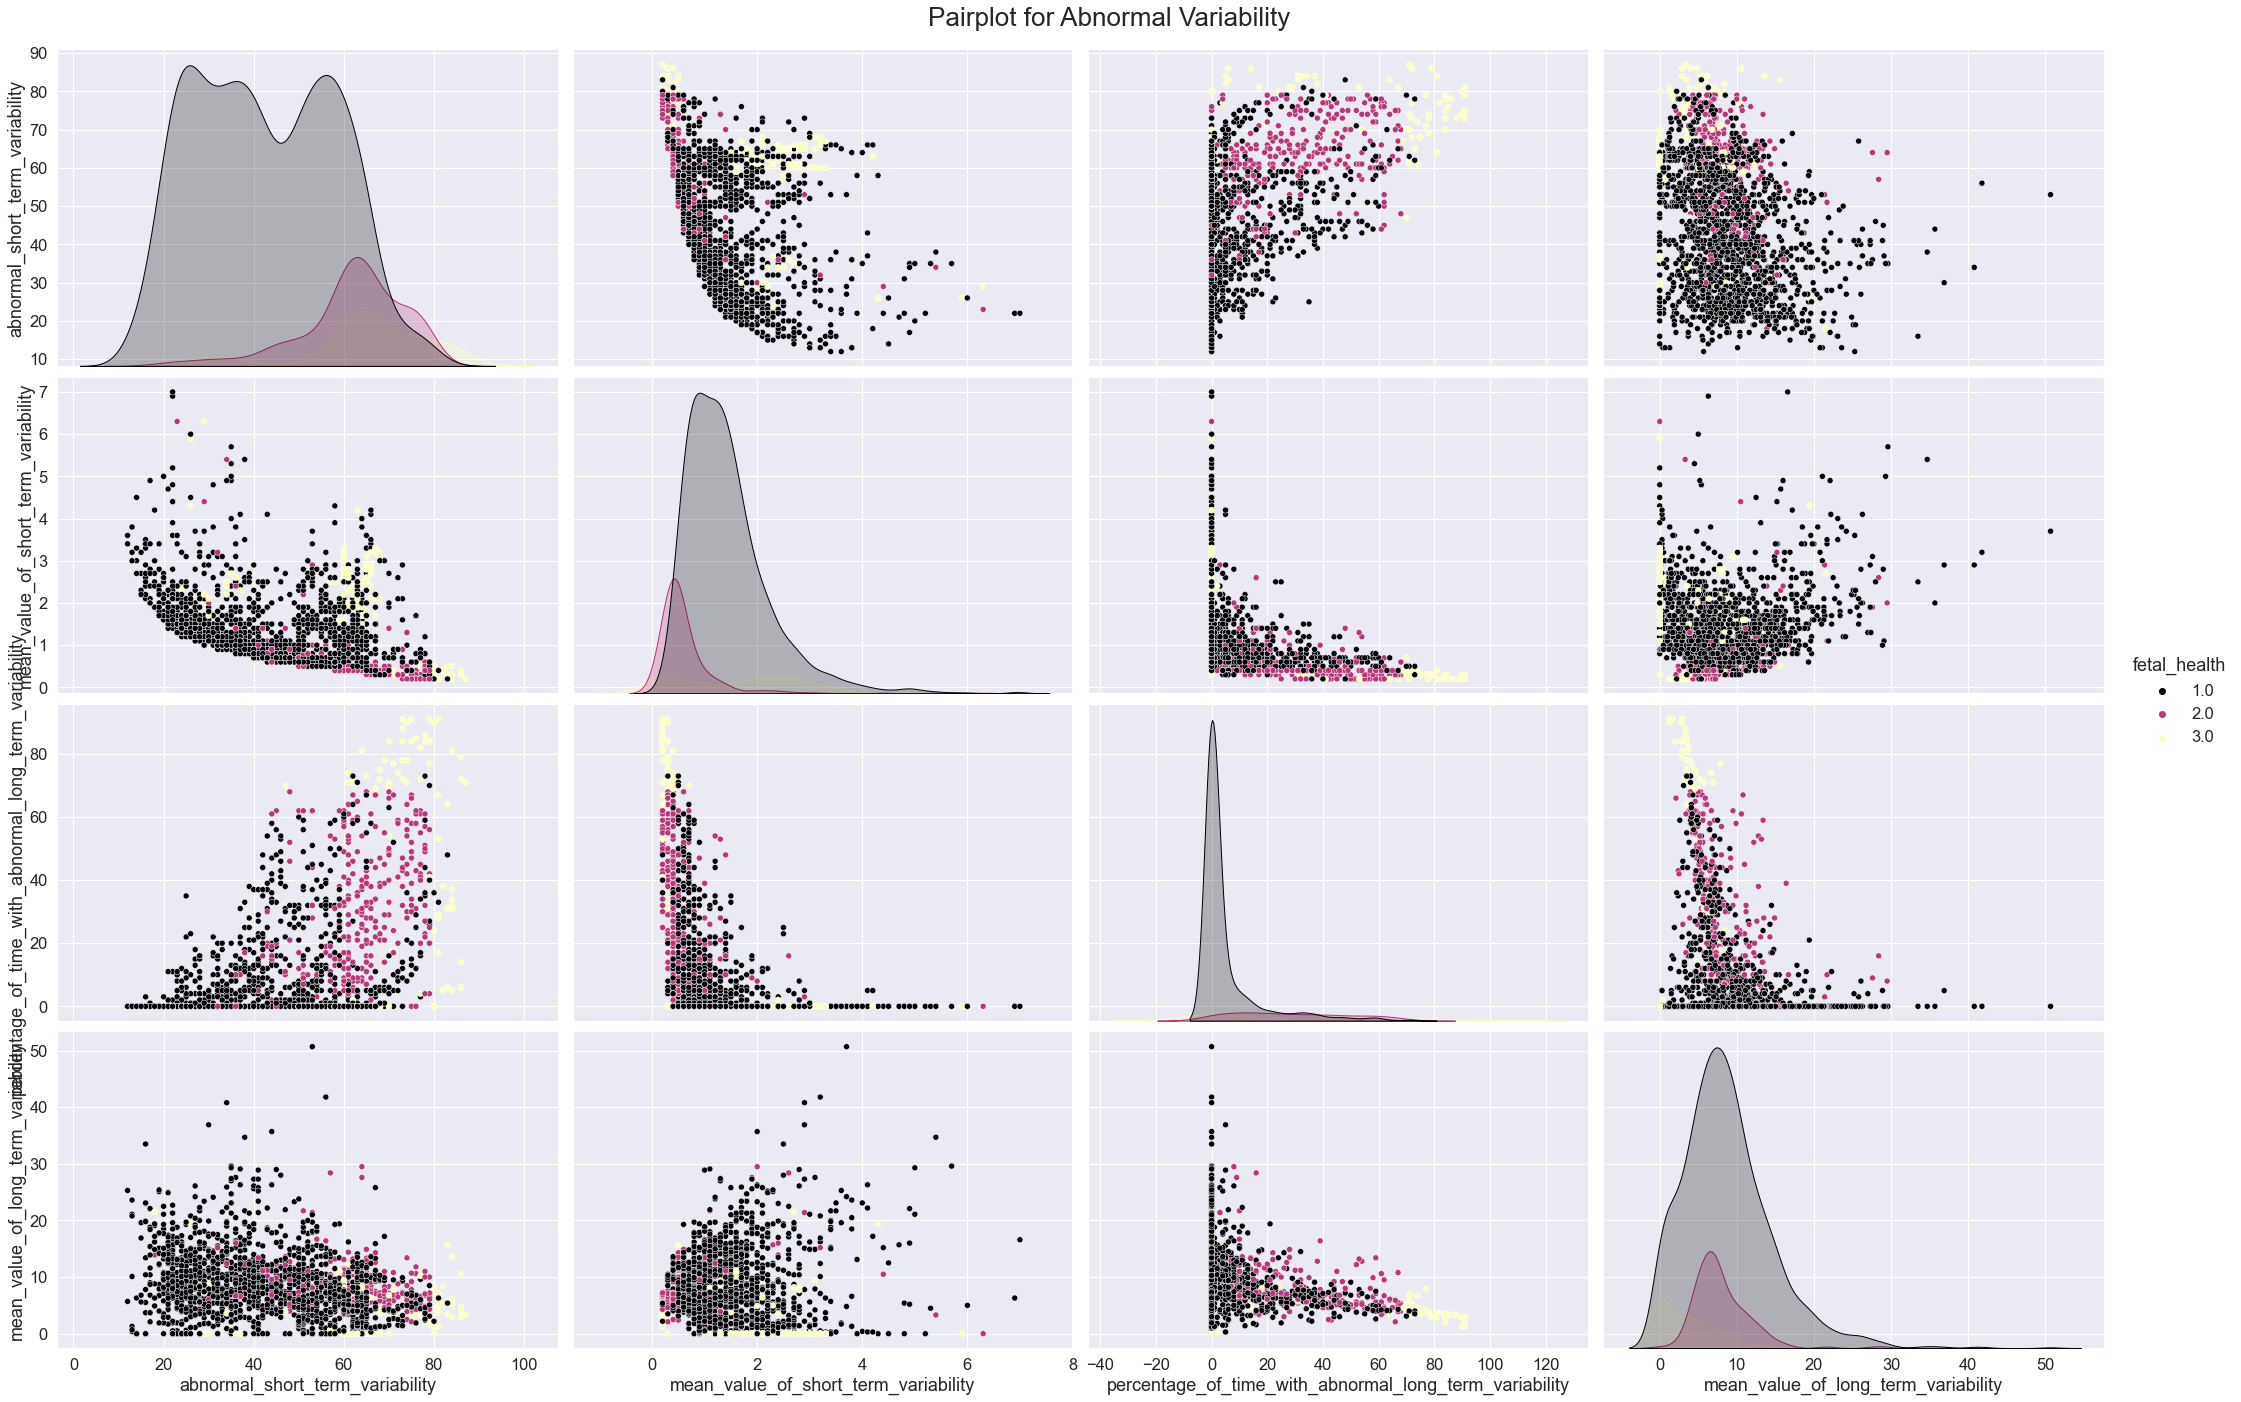

In [178]:
sns.set(font_scale=1.5)
g = sns.pairplot(df[var_cols], hue="fetal_health", height=5, aspect=1.5, palette='magma')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pairplot for Abnormal Variability', fontsize=26)
plt.show()


We can see that pathological records have higher values for these attributes, namely percentage of time with long term variability and abnormal short term variability.

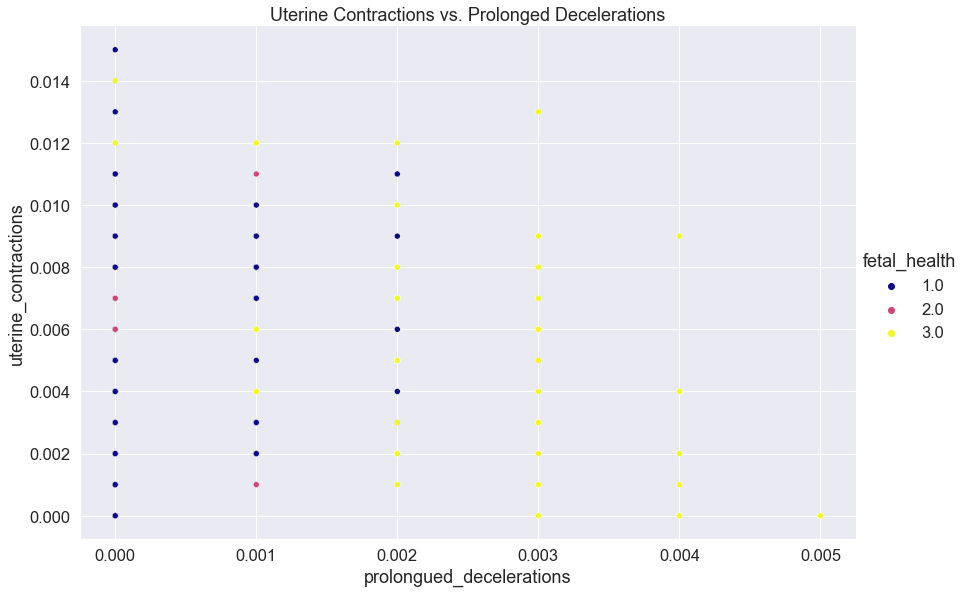

In [72]:
g = sns.relplot(
    data=df,
    x="prolongued_decelerations", y="uterine_contractions",
    hue="fetal_health", height=8, aspect=1.5, palette='plasma')
g.set(title='Uterine Contractions vs. Prolonged Decelerations')
plt.show()

Here is a re-created plot from the pairplot above with most possible plots we can make with the data, where with lower uterine contractions, there are higher prolonged decelerations among pathological records. This is an example within the data of how the classes are separated by the data. I believe using LDA would greatly aid this analysis. 

After reading a little on Cardiotocography, I learned a little more on what is illustrated on the graphs produced. Here is a link to the information: https://en.wikipedia.org/wiki/Cardiotocography

This link also provides some insight into which pregnancies fall under the 3 classes we want to distinguish here. We can use that information to help us.

I then could discern that the histogram prefix of these features refer to graphs generated (fetal heartrate) from the pregnant women.

Below, I'll attempt to get a sense of how many records of various attributes fall under certain ranges of graph features. 

Text(0.5, 0.98, 'Distributions of Cardiotocography Values')

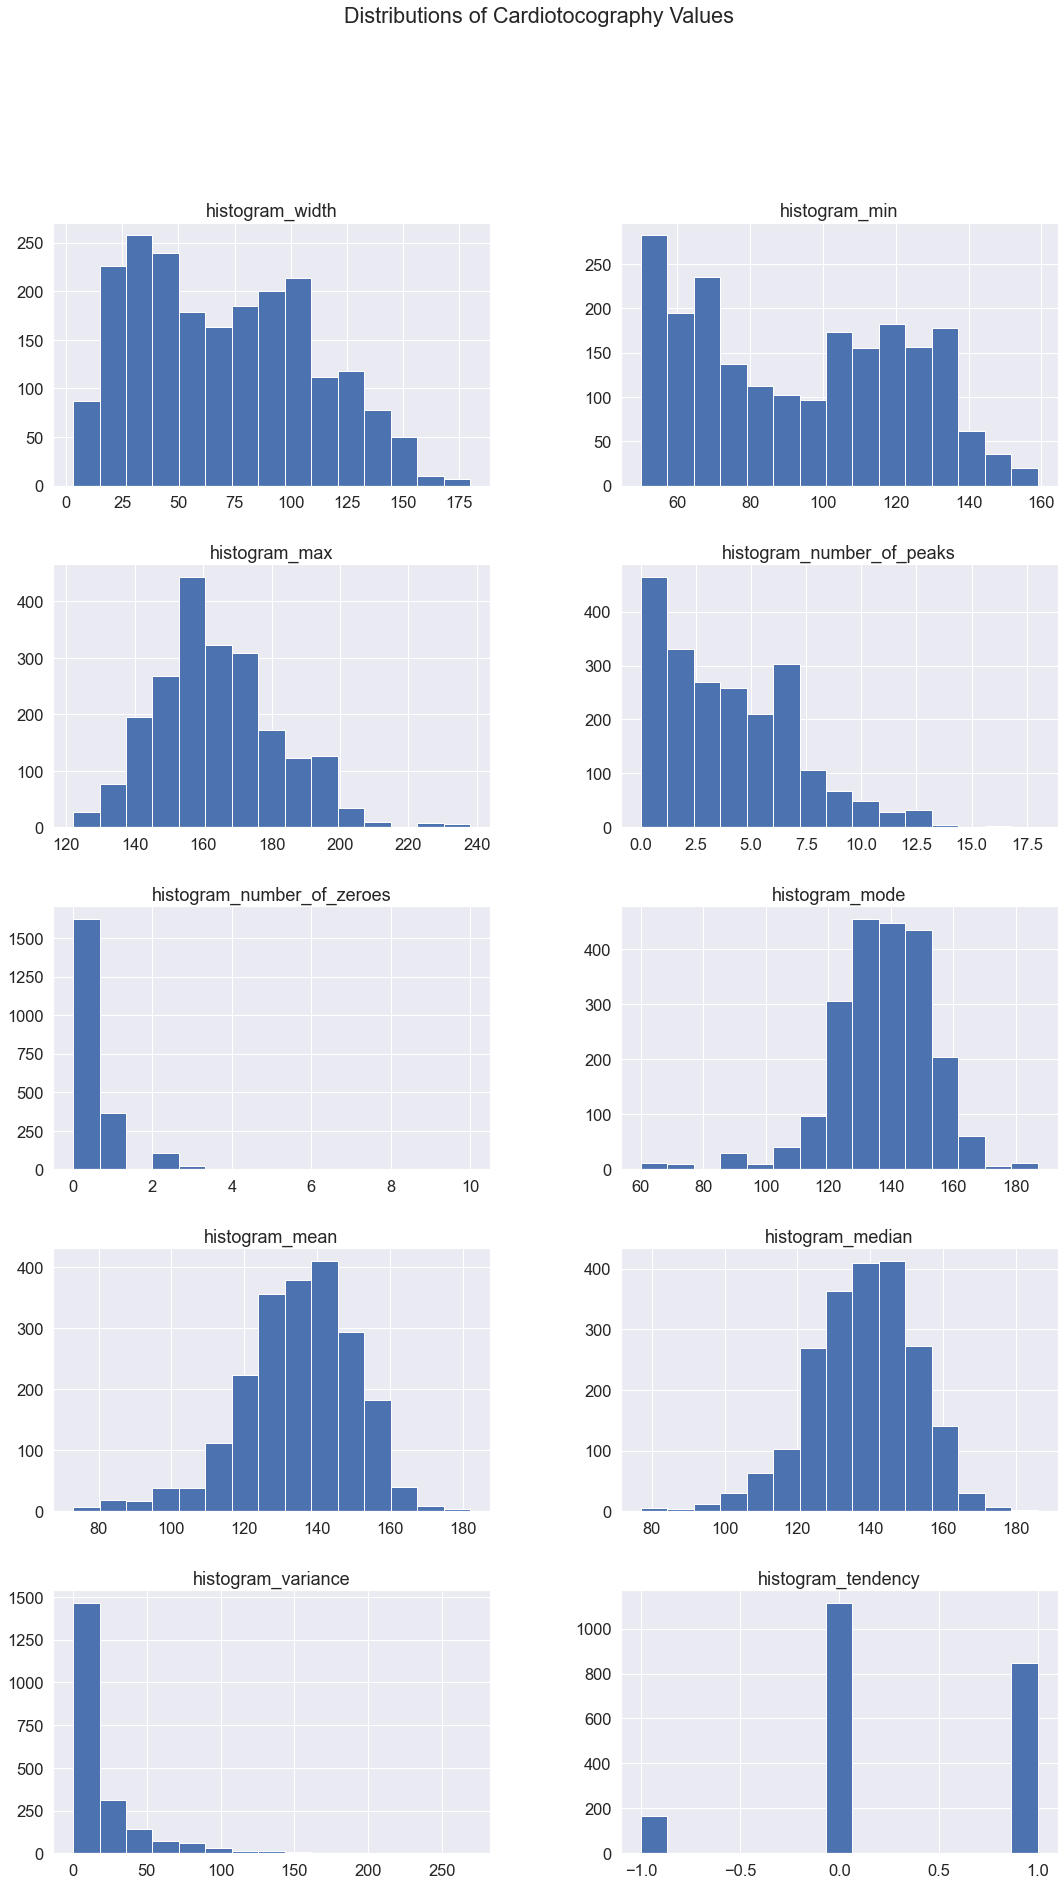

In [94]:
hist_cols = df.columns.tolist()[11:21]

df[hist_cols].hist(bins=15, figsize=(18, 30), layout=(5, 2));
plt.suptitle('Distributions of Cardiotocography Values')

In [181]:
hist_cols.append('fetal_health')

In [186]:
new_hist_cols = hist_cols[-6:]

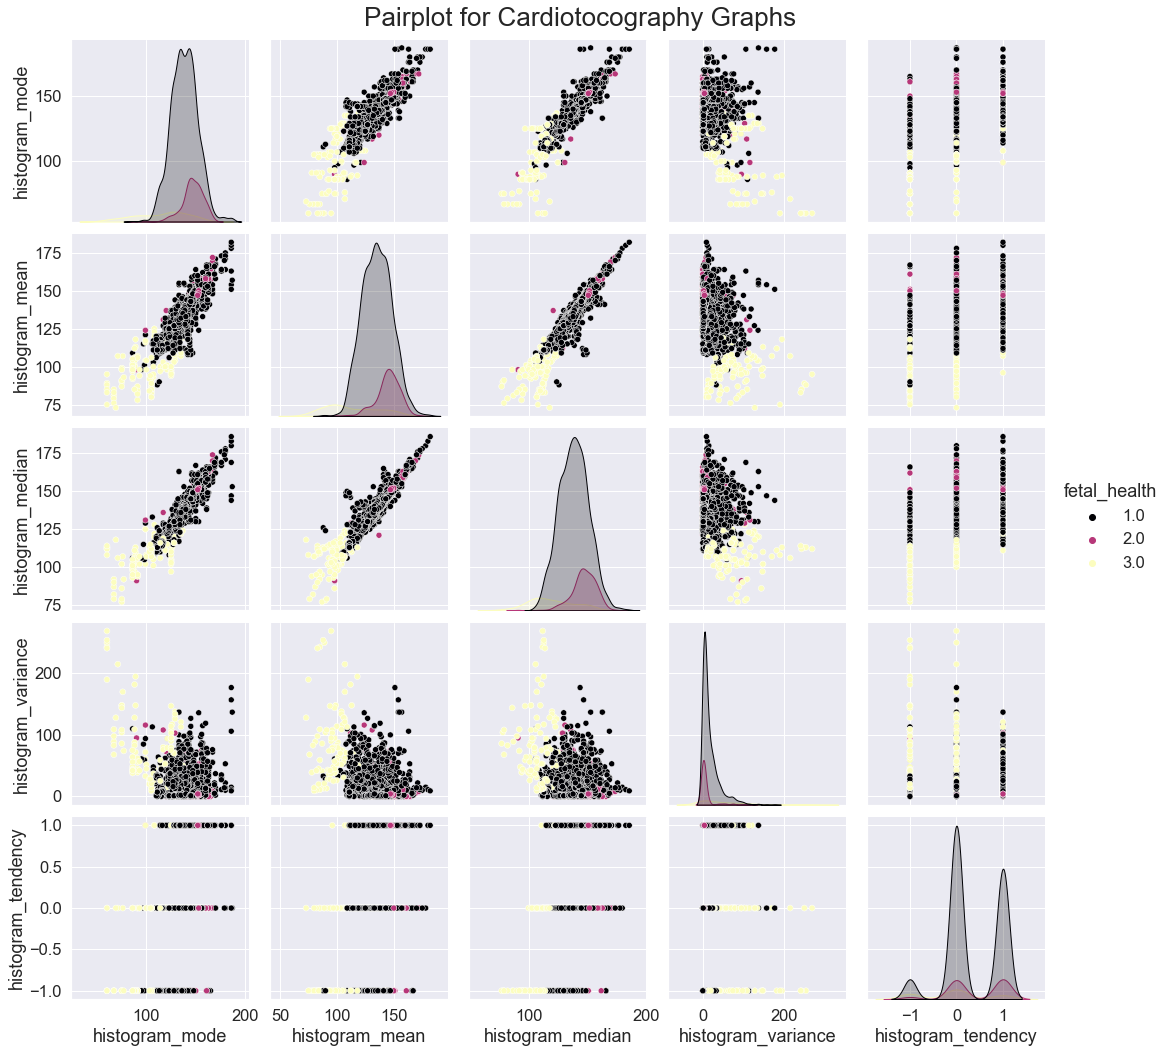

In [190]:
sns.set(font_scale=1.5)
g = sns.pairplot(df[new_hist_cols], hue="fetal_health", height=3, aspect=1.0, palette='magma')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pairplot for Cardiotocography Graphs', fontsize=26)
plt.show()

We can see that pathological records have lower metrics for mode, median, and mean for cardiotocography exams among their graph tendencies. This also comes with higher variance.

The normal and suspect columns have higher values for the same metrics.

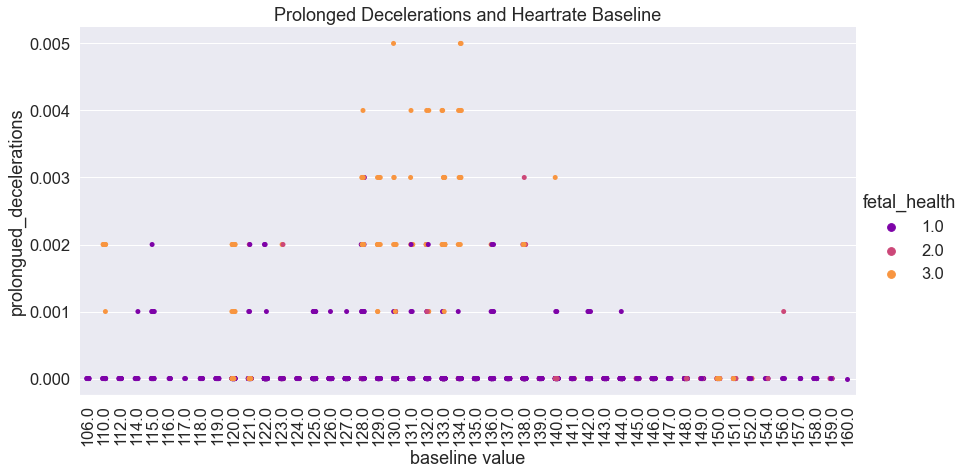

In [105]:
g = sns.catplot(x="baseline value", y="prolongued_decelerations", hue="fetal_health",
                palette="plasma", height=6, aspect=2.0,
                data=df)
g.set_xticklabels(rotation=90)
g.set(title='Prolonged Decelerations and Heartrate Baseline')
g.despine(left=True)

We can see that within a range of heartrate values, pathlogical records have higher prolonged decelerations.

In [111]:
base_comp_cols = pair_cols[1:-1]
base_comp_cols

['fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations']

Below, I will compare two of the deceleration attributes again to decipher any commonalities. Namely, <b>is there a correlation between light and prolonged decelerations?</b>

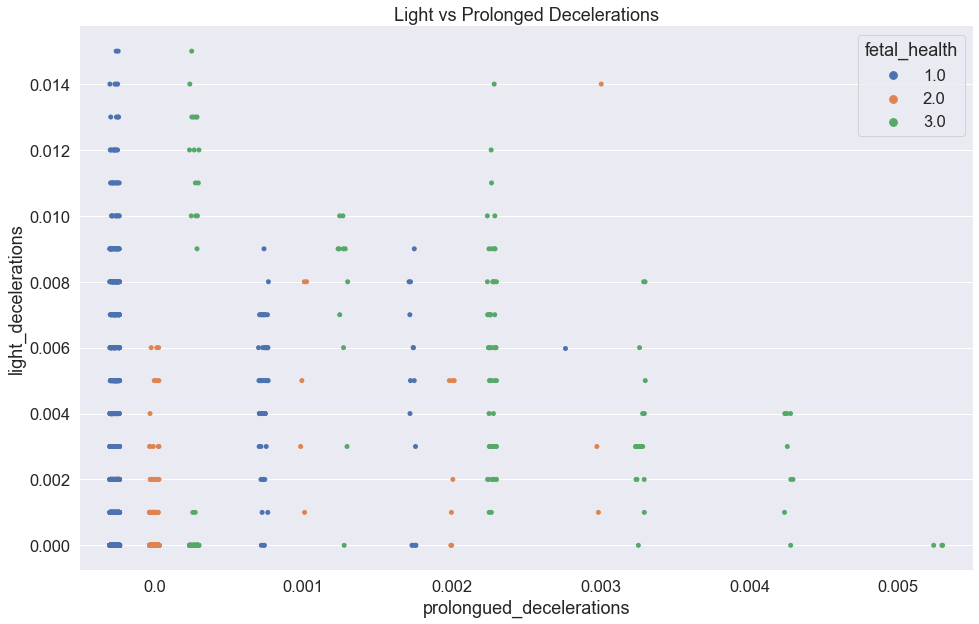

In [154]:
f, ax = plt.subplots(figsize=(16,10))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="prolongued_decelerations", y="light_decelerations", hue="fetal_health",
              data=df, dodge=True)
ax.set_title('Light vs Prolonged Decelerations')
plt.show()

We can see that generally the pathological records have more prolonged decelerations than light decelerations.

Lastly, let's plot a heatmap to pick up any correlations.

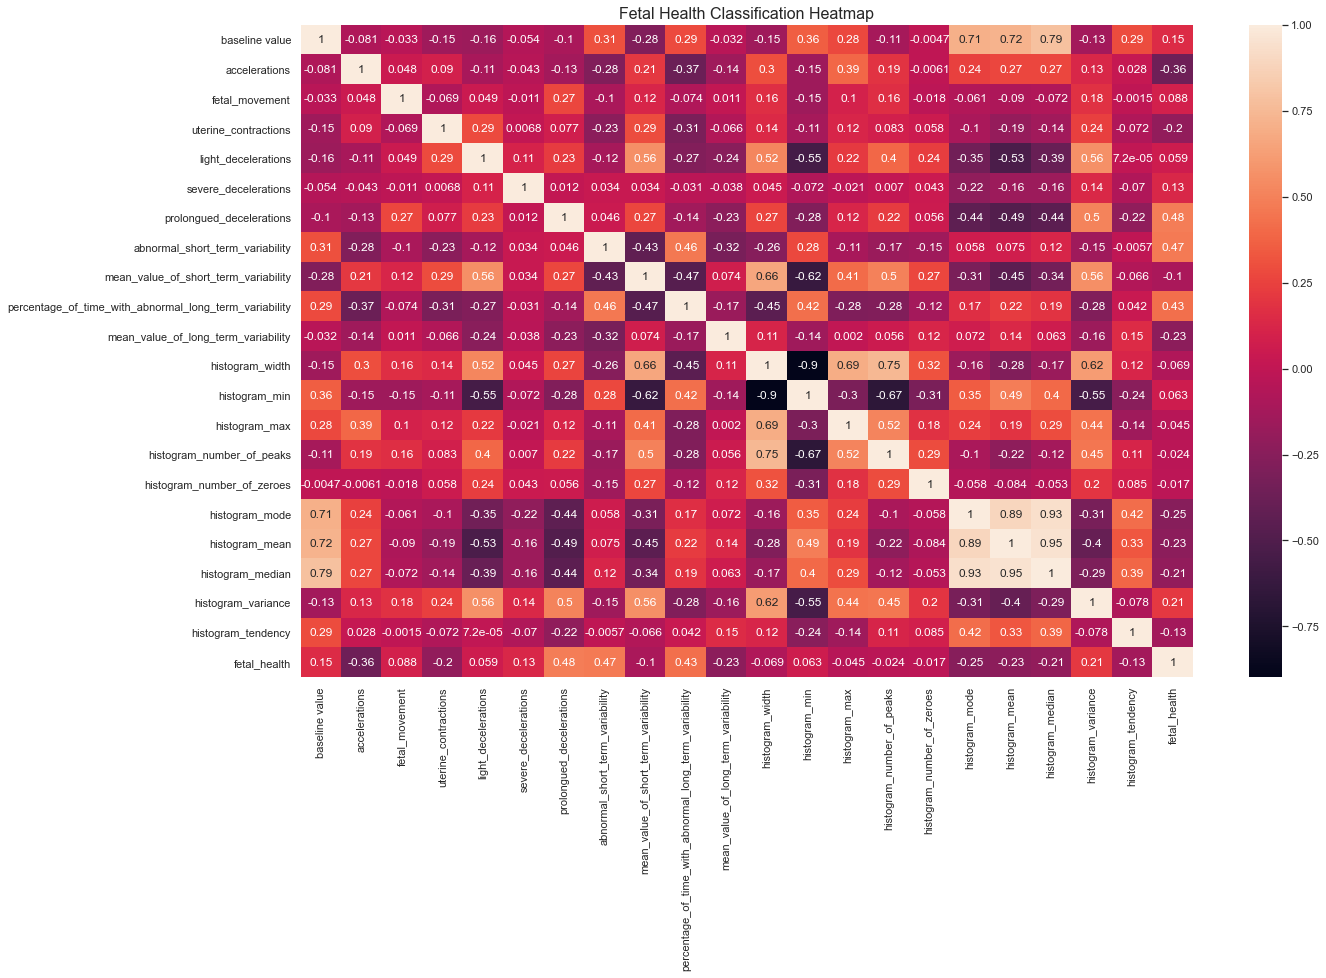

In [195]:
sns.set(font_scale=1.0)
plt.figure(figsize=(20, 12)) 
plt.title('Fetal Health Classification Heatmap', fontsize=16)
heatmap = sns.heatmap(df.corr(), annot=True)

We can notice the cardiotocography exam graph statistic metrics are correlated with each other. We'll keep note of this as we move into model building and track other aspects during the process.

## Closing Remarks:

* Pathological records have more severe and prolonged decelerations. We could see this from the box plots created in the beginning.


* Among pathological reocrds, there are decreases in uterine contractions, fetal movements, and range of baseline heartrate values that correlate with higher pprolonged deceleration rates.


* Among normal and some suspect records, we can see that there are increased accelerations with not as much deceleration. It seems that <b>the suspect and pathological records have more decelerations in general.</b>


* Pathological records have higher values of percentage of time with long term variability and abnormal short term variability.


* Pathological records have lower metrics for mode, median, and mean for cardiotocography exams among their graph tendencies, while normal records have higher values for these metrics. This correlates with their cardiotocography graphs.

Within model building, I believe LDA will be a great step in determining what best separates these classes.